## Reconstruction parcimonieuse


On s'intéresse au problème

$$\hspace{5cm} (\mathcal{P})\quad \min_{x\in \mathbb{R}^n}f(x) = \frac{1}{2}\Vert H x-y \Vert_W^2+\lambda \Vert x \Vert_1 $$

avec $y\in \mathbb{R}^m$ une observation du signal à reconstruire, $H\in \mathcal{M}_{m,n}(\mathbb{R})$, $W\in \mathcal{M}_{m}(\mathbb{R})$ symétrique définie positive. La matrice $W$ introduit une pondération sur les composantes du résidu.

**Question 1 :** Justifier la convexité de la fonctionnelle et donner un sous-gradient.


On montre la convexité de la fonctionnelle en montrant que la fonctionnelle est convexe en $x$ pour tout $x\in \mathbb{R}^n$ et tout $t\in [0,1]$.
$$\forall x\in \mathbb{R}^n, t\in [0,1], \quad f(tx+(1-t)x) \leq tf(x)+(1-t)f(x)$$
Démonstration : 
$$\forall x\in \mathbb{R}^n, t\in [0,1], \quad f(tx+(1-t)x) \leq \frac{1}{2}\Vert H tx-(1-t)y \Vert_W^2+\lambda \Vert tx \Vert_1 +\frac{1}{2}\Vert H (1-t)x-(1-t)y \Vert_W^2+\lambda \Vert (1-t)x \Vert_1$$
$$\leq \frac{1}{2}\Vert H tx-(1-t)y \Vert_W^2+\lambda \Vert tx \Vert_1 +\frac{1}{2}\Vert H (1-t)x-(1-t)y \Vert_W^2+\lambda \Vert (1-t)x \Vert_1$$
$$\leq tf(x)+(1-t)f(x)$$


Calcul du sous-gradient :
$$\forall x\in \mathbb{R}^n, \quad \nabla f(x) = H^TWHx-H^TWy+\lambda sign(x)$$


In [39]:
# using Pkg
# Pkg.add("LinearAlgebra")
# Pkg.add("Plots")
using Plots
using LinearAlgebra

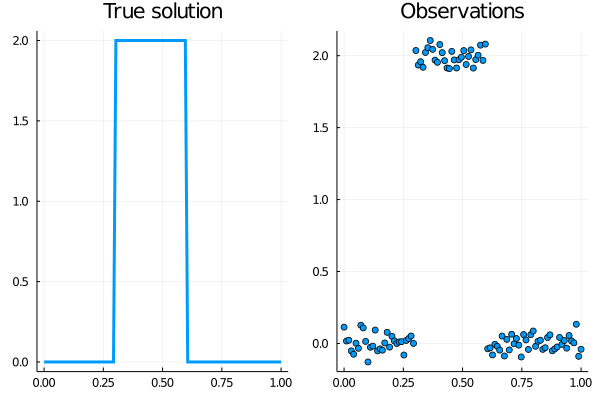

In [40]:
# Construction du problème #
############################

# solution à reconstruire 
##########################
dx=0.01;

n=Int(1/dx);#+1;
px=LinRange(0.,1.,n);
xt=zeros(n,1);

for i = 1:n
    if (px[i] > 0.3 && px[i]< 0.6)
        xt[i] = 2;         
    end
end


#observations
#############
nobs=1;
m=Int(floor(n/nobs));
var_obs=0.05;
sigmaW=ones(m,1)+2.0*rand(Float64,(m,1));

H=zeros(m,n);
py=zeros(m,1);
W=zeros(m,m);
for i=1:m
   H[i,(i-1)*nobs+1]=1;
   py[i]=px[(i-1)*nobs+1]; 
   W[i,i]=sigmaW[i];
end    
y=H*xt+var_obs*randn(Float64,(m,1));


p1=plot(px,xt,title="True solution",label=["xt"],lw=3);
p2=scatter(py,y,title="Observations",lw=3);
plot(p1,p2,layout=(1,2),legend=false)

**Question 2 :** Proposer le calcul de l'évaluation de f et d'un sous-gradient de f

In [41]:
# Fonction évaluant f en x
function evalf(x,y,H,W,lambda)
    V = H*x-y
    m = (V'*W*V)[1]
    return (1/2)*m + lambda.*norm(x,1)
end

# Fonction évaluant un sous-gradient de f en x
function subgradf(x,y,H,W,lambda)
    return H'*W*(H*x-y)+lambda*sign.(x)
end

subgradf (generic function with 1 method)

**Question 3 :** Résoudre le problème en utilisant un algorithme de sous-gradient. Vous implanterez les trois stratégies de pas vues en cours. Vous afficherez les courbes de convergence de $f_{best}^k$. 

**Question 4 :** Quelle influence a le paramètre $\lambda$ sur la convergence de l'algorithme et la qualité de la soltuion optimisée ?

Le paramètre $\lambda$ a une influence sur la convergence de l'algorithme. En effet, plus $\lambda$ est grand, plus la solution optimisée est proche de 0. Ainsi, plus $\lambda$ est grand, plus la solution optimisée est proche de 0 et plus l'algorithme converge rapidement.

Il a égallement une influence sur la qualité de la solution optimisée. En effet, plus $\lambda$ est grand, plus la solution optimisée est proche de 0. Ainsi, plus $\lambda$ est grand, plus la solution optimisée est proche de 0 et plus la qualité de la solution optimisée est bonne.

fbest = 0.6258123287672192
xbest = [0.1087100429898696; 0.013389839047437381; 0.01729930547767686; -0.044680904988752546; -0.07133042210108097; 5.417833866091659e-5; -0.028822787867865032; 0.12258273999112505; 0.10451875394309418; 0.009480796676840979; -0.12242947118216632; -0.01928591023316551; -0.011265635307962403; 0.08451646480534894; -0.04722092201883809; -0.030565104860638855; -0.038143673415383994; 5.810779335707849e-6; 0.06958295437992419; -0.016829717020020663; 0.04543871961304481; 0.014461102673544089; -2.613452555125798e-5; 0.005851105859471085; 0.008735568922410642; -0.07473859560323924; 0.014289134577369314; 0.029361205719569936; 0.04772122945963414; 6.0469997542396146e-5; 2.0152005023562616; 1.9296828510797088; 1.9539147106037151; 1.9113691514547995; 2.018653041790429; 2.052121394611853; 2.1019904986819267; 2.040272567622038; 1.9638585054102207; 1.9478055870834656; 2.07414722699546; 2.0121557068349087; 1.961874512955313; 1.908376161416944; 1.9059845803916942; 2.0263686768

0.6266007085655109, 0.6265794720217595, 0.626560495315626, 0.6265392669618814, 0.6265215778515232, 0.6265018969378364, 0.6264849161495586, 0.6264661684201511, 0.6264485490990562, 0.6264319654325763, 0.6264152463643385, 0.6263993869021268, 0.6263832796842694, 0.6263669294919753, 0.6263529272459164, 0.6263372587898112, 0.6263240246411803, 0.626308967468251, 0.6262947448521089, 0.626282016402694, 0.62626789345263, 0.6262566765508139, 0.6262422990438016, 0.6262308581001472, 0.6262181748472012, 0.6262071096844489, 0.6261954672990787, 0.626184073775373, 0.62617259491818, 0.6261625368502787, 0.6261516905232511, 0.6261422807268171, 0.6261311196546655, 0.6261217826569465, 0.6261115433427217, 0.6261034798567618, 0.6260935474855381, 0.6260850359764818, 0.6260753883498167, 0.6260673537262647, 0.6260593729103472, 0.6260506367245305, 0.6260435488372497, 0.6260341508195424, 0.6260279644835326, 0.6260198544037042, 0.6260131201298821, 0.6260056214831732, 0.6259979633707542, 0.6259920624401475, 0.625985

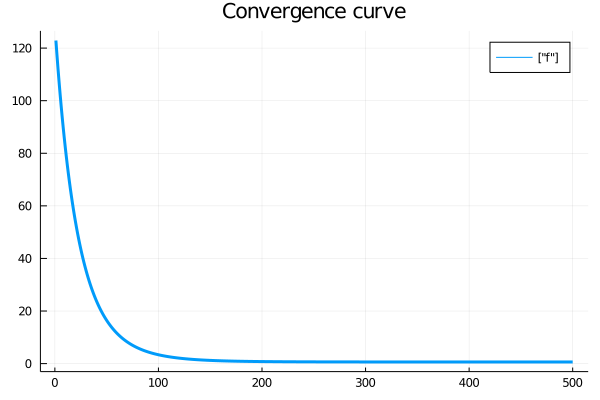

In [42]:
#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k

lambda=1e-2;

pas=1;
itermax=500;

xp=x;

# Choix de la méthode :
# 1 : Gradient à pas fixe
# 2 : Gradient à pas optimal
# 3 : Gradient à pas optimal avec recherche linéaire
method = 1
while i < itermax
    global i = i + 1;
    # Insérer votre code

    f = evalf(xp,y,H,W,lambda)
    if f < fbest
        global fbest = f
        global xbest = xp
    end
    g = subgradf(xp,y,H,W,lambda)
    
    # Calcul du pas
    if method == 1
        # Pas fixe
        global pas = 1e-2
        global xp = xp - pas*g
    elseif method == 2
        # Pas optimal
        V = H*xp-y
        m = (V'*W*V)[1]
        global xp = xp - (1/m)*g
        # global xp = xp - norm(g,2)^2 / (g'*H'*W*H*g) * g
    elseif method == 3
        # Pas optimal avec recherche linéaire
        alpha = 0.5
        beta = 0.5
        t = 1
        while evalf(xp-t*g,y,H,W,lambda) > f - alpha*t*norm(g,2)^2
            t = beta*t
        end
        global xp = xp - t*g
    end

    # Fin insérer code
    
    # Stockage
    append!( histo, fbest)
end
#histo
#Affichage des courbes de convergence
#plotly();
iter=1:itermax;
println("fbest = ",fbest)
println("xbest = ",xbest)
println("histo = ",histo)
plot(iter,histo,title="Convergence curve",label=["f"],lw=3)

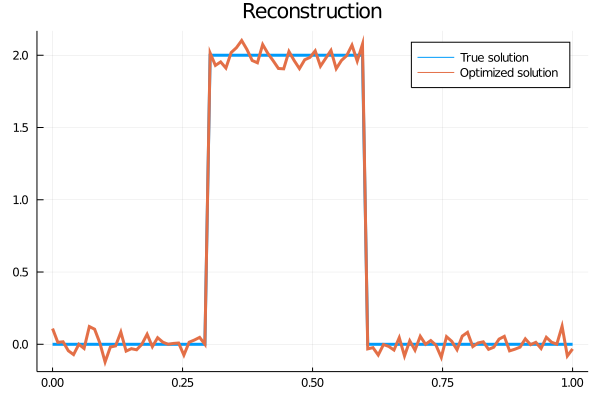

In [43]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

**Question 5 :** On pose $h(x)=\lambda \Vert x\Vert_1$ et $g(x)=\frac{1}{2}\Vert Hx-y\Vert_W^2$. Donner une expression analytique de la fonction proximale de h et implanter cette fonction. Implanter la fonction $g$ ainsi que son gradient.


Expression analytique de la fonction proximale de h :
$$\forall x\in \mathbb{R}^n, \quad prox_{\lambda h}(x) = sign(x)\max(|x|- \lambda,0)$$

In [44]:
# Evaluation de prox_h
function proxh(x,lambda) 
# Insérer votre code
    l = length(x)
    z = zeros(l)
    for i in 1:l
        if x[i] >= lambda
            z[i] = x[i] - lambda;
        elseif x[i] <= lambda
            z[i] = x[i] + lambda;
        end
    end
    return z
# Fin insérer code
end

#Evaluation de g
function evalg(x,y,H,W)
# Insérer votre code
    V = H*x-y
    m = (V'*W*V)[1]
    return (1/2)*m
# Fin insérer code
end    


#Evaluation du gradient de g
function gradg(x,y,H,W)
# Insérer votre code
    return H'*W*(H*x-y)
# Fin insérer code
end    

gradg (generic function with 1 method)

**Question 6 :** Résoudre le problème par la méthode du gradient proximal avec recherche linéaire pour le pas. Vous implanterez en prémabule la fonction de recherche linéaire.

In [45]:
# Fonction calculant le pas par recherche linéaire
# Insérer votre code
function pasRL(x,y,H,W,lambda)
    alpha = 0.5
    beta = 0.5
    t = 1
    maxiter = 100
    iter = 0
    while evalg(proxh(x-t*gradg(x,y,H,W),lambda),y,H,W) > evalg(x,y,H,W) - alpha*t*norm(gradg(x,y,H,W),2)^2 && iter < maxiter
        iter = iter + 1
        t = beta*t
    end
    return t
end
# Fin insérer code

pasRL (generic function with 1 method)

fbest = 1.9195643733838234e-147
xbest = [0.1133582464913545, 0.016796888876101226, 0.022142759442029807, -0.05162160463555291, -0.07504130262967929, 0.0016255243981257756, -0.03359113320416902, 0.1268781376460376, 0.10814162506164438, 0.014340018330320975, -0.12872849191133026, -0.02648812577438624, -0.018820198119442248, 0.09288859813447864, -0.05177410157191301, -0.03759159165393636, -0.04681522963536727, 0.0035428596594803347, 0.07714918486731755, -0.025593882055785618, 0.049831211622769676, 0.017860277017535155, -0.0005295508575056295, 0.010490389967475748, 0.012102658772273926, -0.08043875821603258, 0.020916169989067174, 0.03412633340700786, 0.05196661647713116, 0.0002973104778992585, 2.0360887594578974, 1.9348573868485694, 1.9582571184969688, 1.919487788193288, 2.022442054031981, 2.0557787919397414, 2.105548039830707, 2.044056038991736, 1.9691614250327427, 1.954100745362952, 2.0776199426273747, 2.0212664113462777, 1.9653221368010685, 1.9145717560384545, 1.9103922197522458, 2.0297

, 1.3698469114563118e-102, 6.849234557281559e-103, 3.4246172786407795e-103, 1.7123086393203898e-103, 8.561543196601949e-104, 4.2807715983009744e-104, 2.1403857991504872e-104, 1.0701928995752436e-104, 5.350964497876218e-105, 2.675482248938109e-105, 1.3377411244690545e-105, 6.6887056223452725e-106, 3.3443528111726363e-106, 1.6721764055863181e-106, 8.360882027931591e-107, 4.1804410139657953e-107, 2.0902205069828977e-107, 1.0451102534914488e-107, 5.225551267457244e-108, 2.612775633728622e-108, 1.306387816864311e-108, 6.531939084321555e-109, 3.2659695421607776e-109, 1.6329847710803888e-109, 8.164923855401944e-110, 4.082461927700972e-110, 2.041230963850486e-110, 1.020615481925243e-110, 5.103077409626215e-111, 2.5515387048131075e-111, 1.2757693524065537e-111, 6.378846762032769e-112, 3.1894233810163844e-112, 1.5947116905081922e-112, 7.973558452540961e-113, 3.9867792262704805e-113, 1.9933896131352402e-113, 9.966948065676201e-114, 4.9834740328381006e-114, 2.4917370164190503e-114, 1.2458685082095

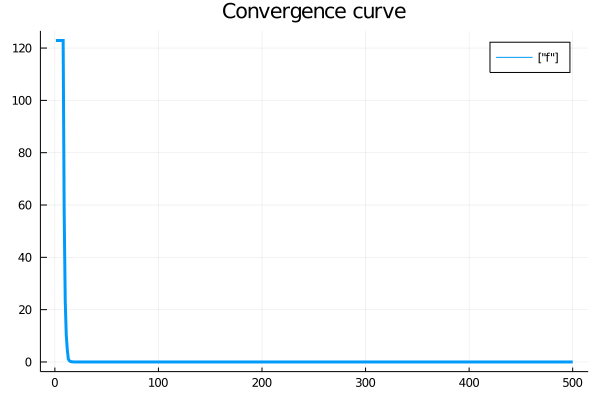

In [46]:
#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k 

lambda0=100;
itermax=500;
beta=0.5;

xp=x;

while i < itermax
    global i = i + 1;
    # Insérer votre code
    global lambda = lambda0*beta^i
    f = evalf(xp,y,H,W,lambda)
    if f < fbest
        global fbest = f
        global xbest = xp
    end
    g = subgradf(xp,y,H,W,lambda)
    t = pasRL(xp,y,H,W,lambda)
    global xp = proxh(xp-t*g,lambda)
    # Fin insérer code
    
    # Stockage
    append!( histo, fbest)
end
#histo
#Affichage des courbes de convergence
#plotly();
iter=1:itermax;
println("fbest = ",fbest)
println("xbest = ",xbest)
println("histo = ",histo)
plot(iter,histo,title="Convergence curve",label=["f"],lw=3)

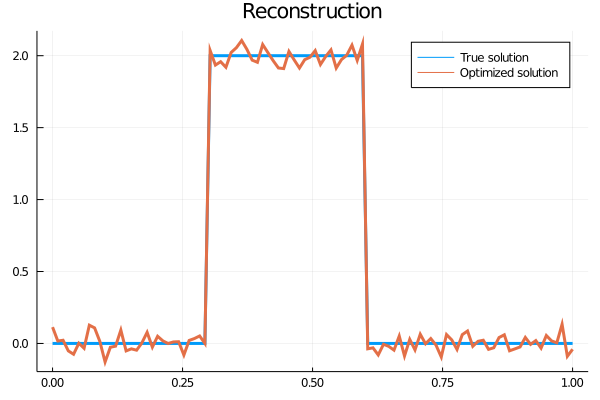

In [47]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

**Question 7 :** Evaluez la sensisibilité de l'algorithme aux différents paramètres : $\lambda_0$, $\beta$, itermax.  

## Evaluation de la sensibilité de l'algorithme au paramètre $\lambda_0$

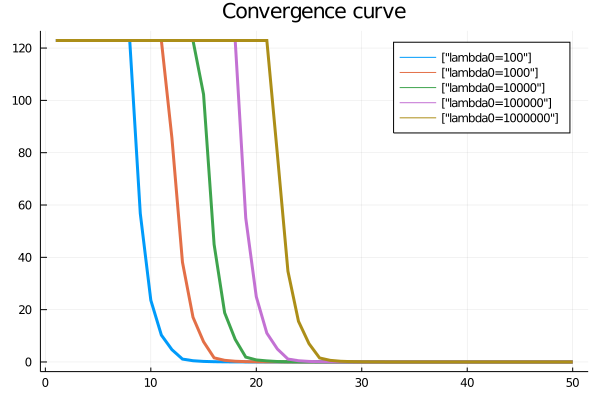

In [48]:
# Evaluation de la sensibilité au paramètre lambda0
# fonction résoud le problème de minimisation avec un paramètre lambda0 fixé
function solve(x,y,H,W,lambda0,itermax,beta)
    #Initialisation
    x = zeros(n,1);
    xbest=x;
    i = 0;
    fbest =1000000; # $f_{best}^0$
    histo =[];# Suite des itérés f_{best}^k 

    lambda=lambda0;
    xp=x;

    while i < itermax
        i = i + 1;
        # Insérer votre code
        lambda = lambda0*beta^i
        f = evalf(xp,y,H,W,lambda)
        if f < fbest
            fbest = f
            xbest = xp
        end
        g = subgradf(xp,y,H,W,lambda)
        t = pasRL(xp,y,H,W,lambda)
        xp = proxh(xp-t*g,lambda)
        # Fin insérer code

        # Stockage
        append!( histo, fbest)
    end
    return histo
end

# sensibilité au paramètre lambda0
lambda0=100;
itermax=50;
beta=0.5;
histo1 = solve(x,y,H,W,lambda0,itermax,beta)
lambda0=1000;
histo2 = solve(x,y,H,W,lambda0,itermax,beta)
lambda0=10000;
histo3 = solve(x,y,H,W,lambda0,itermax,beta)
lambda0=100000;
histo4 = solve(x,y,H,W,lambda0,itermax,beta)
lambda0=1000000;
histo5 = solve(x,y,H,W,lambda0,itermax,beta)

iter=1:itermax;
plot(iter,histo1,title="Convergence curve",label=["lambda0=100"],lw=3)
plot!(iter,histo2,label=["lambda0=1000"],lw=3)
plot!(iter,histo3,label=["lambda0=10000"],lw=3)
plot!(iter,histo4,label=["lambda0=100000"],lw=3)
plot!(iter,histo5,label=["lambda0=1000000"],lw=3)


$\lambda_0$ : plus $\lambda_0$ est grand, plus l'algorithme converge lentement.

## Evalutation de la sensibilité de l'algorithme au paramètre $\beta$

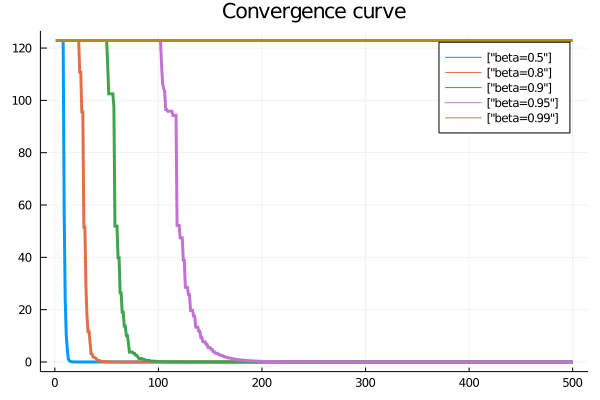

In [49]:
# Evaluation de la sensibilité au paramètre beta
# fonction résoud le problème de minimisation avec un paramètre beta fixé
function solve(x,y,H,W,lambda0,itermax,beta)
    #Initialisation
    x = zeros(n,1);
    xbest=x;
    i = 0;
    fbest =1000000; # $f_{best}^0$
    histo =[];# Suite des itérés f_{best}^k 

    lambda=lambda0;
    xp=x;

    while i < itermax
        i = i + 1;
        # Insérer votre code
        lambda = lambda0*beta^i
        f = evalf(xp,y,H,W,lambda)
        if f < fbest
            fbest = f
            xbest = xp
        end
        g = subgradf(xp,y,H,W,lambda)
        t = pasRL(xp,y,H,W,lambda)
        xp = proxh(xp-t*g,lambda)
        # Fin insérer code

        # Stockage
        append!( histo, fbest)
    end
    return histo
end

# sensibilité au paramètre beta
lambda0=100;
itermax=500;
beta=0.5;
histo1 = solve(x,y,H,W,lambda0,itermax,beta)
beta=0.8;
histo2 = solve(x,y,H,W,lambda0,itermax,beta)
beta=0.9;
histo3 = solve(x,y,H,W,lambda0,itermax,beta)
beta=0.95;
histo4 = solve(x,y,H,W,lambda0,itermax,beta)
beta=0.99;
histo5 = solve(x,y,H,W,lambda0,itermax,beta)

iter=1:itermax;
plot(iter,histo1,title="Convergence curve",label=["beta=0.5"],lw=3) 
plot!(iter,histo2,label=["beta=0.8"],lw=3)
plot!(iter,histo3,label=["beta=0.9"],lw=3)
plot!(iter,histo4,label=["beta=0.95"],lw=3)
plot!(iter,histo5,label=["beta=0.99"],lw=3)

$\beta$ : plus $\beta$ est proche de 1, plus l'algorithme converge lentement et plus la qualité de la solution optimisée est mauvaise.

## Evaluation de la sensibilité de l'algorithme au paramètre itermax

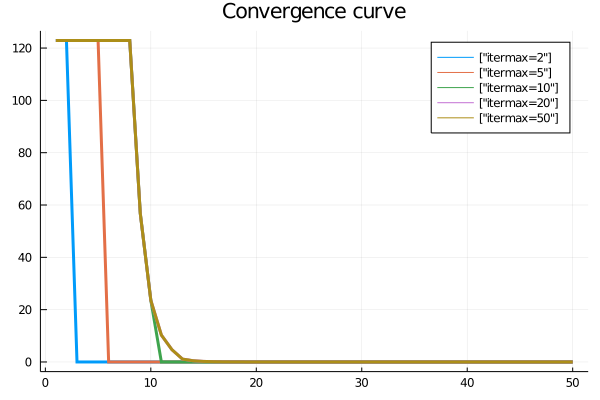

In [50]:
# Evaluation de la sensibilité au paramètre itermax
# fonction résoud le problème de minimisation avec un paramètre itermax fixé
function solve(x,y,H,W,lambda0,itermax,beta)
    #Initialisation
    x = zeros(n,1);
    xbest=x;
    i = 0;
    fbest =1000000; # $f_{best}^0$
    histo =[];# Suite des itérés f_{best}^k 

    lambda=lambda0;
    xp=x;

    while i < itermax
        i = i + 1;
        # Insérer votre code
        lambda = lambda0*beta^i
        f = evalf(xp,y,H,W,lambda)
        if f < fbest
            fbest = f
            xbest = xp
        end
        g = subgradf(xp,y,H,W,lambda)
        t = pasRL(xp,y,H,W,lambda)
        xp = proxh(xp-t*g,lambda)
        # Fin insérer code

        # Stockage
        append!( histo, fbest)
    end
    return histo
end

# sensibilité au paramètre itermax
lambda0=100;
itermax=2;
beta=0.5;
histo1 = solve(x,y,H,W,lambda0,itermax,beta)
itermax=5;
histo2 = solve(x,y,H,W,lambda0,itermax,beta)
itermax=10;
histo3 = solve(x,y,H,W,lambda0,itermax,beta)
itermax=20;
histo4 = solve(x,y,H,W,lambda0,itermax,beta)
itermax=50;
histo5 = solve(x,y,H,W,lambda0,itermax,beta)

# add zeros to have same length for plotting
histo1 = [histo1; zeros(50-length(histo1))]
histo2 = [histo2; zeros(50-length(histo2))]
histo3 = [histo3; zeros(50-length(histo3))]
histo4 = [histo4; zeros(50-length(histo4))]
histo5 = [histo5; zeros(50-length(histo5))]

iter=1:itermax;
plot(iter,histo1,title="Convergence curve",label=["itermax=2"],lw=3)
plot!(iter,histo2,label=["itermax=5"],lw=3)
plot!(iter,histo3,label=["itermax=10"],lw=3)
plot!(iter,histo4,label=["itermax=20"],lw=3)
plot!(iter,histo5,label=["itermax=50"],lw=3)


itermax : plus itermax est grand, plus l'algorithme converge lentement.